In [22]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

In [23]:
df=pd.read_csv("C:/Users/BHUVANA/Downloads/archive (6).zip")

In [4]:
df.head(100)

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,Cholesterol_Level,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction
0,PID_000001,China,67,Female,28.6,No,Low,Yes,No,Diabetes,...,228,8.1,4.4,361,Negative,Mild,691,Surgery,6.5,Yes
1,PID_000002,Saudi Arabia,83,Female,19.4,No,Low,No,No,Diabetes,...,186,9.7,6.2,235,Negative,Moderate,275,Chemotherapy,1.6,No
2,PID_000003,France,52,Female,17.2,No,Low,Yes,No,Diabetes,...,231,8.2,4.6,269,Negative,Moderate,668,Chemotherapy,0.7,No
3,PID_000004,Russia,71,Male,31.8,Yes,Low,No,No,NaN,...,151,6.8,6.0,193,Negative,Moderate,256,Radiation,2.1,No
4,PID_000005,USA,19,Female,17.7,No,Low,No,No,Hypertension,...,236,6.7,4.9,396,Negative,Mild,370,Radiation,0.5,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,PID_000096,Brazil,33,Male,22.3,No,Low,No,No,Diabetes,...,157,5.9,5.1,383,Positive,Mild,442,Chemotherapy,4.0,No
96,PID_000097,Brazil,69,Male,22.4,No,High,No,No,NaN,...,238,7.0,4.9,322,Negative,Mild,446,Surgery,0.0,No
97,PID_000098,Brazil,34,Male,23.6,No,Low,Yes,No,Diabetes,...,165,7.6,5.2,271,Negative,Severe,47,Chemotherapy,1.2,No
98,PID_000099,USA,67,Male,24.5,No,Low,No,No,Diabetes,...,207,7.6,5.8,336,Negative,Moderate,727,Chemotherapy,2.8,No


In [5]:
df['Age'].value_counts()

Age
36    3752
53    3723
69    3697
66    3689
43    3687
      ... 
79    3548
73    3520
75    3516
82    3513
81    3507
Name: count, Length: 72, dtype: int64

In [6]:
df.isnull().sum()

Patient_ID                             0
Country                                0
Age                                    0
Gender                                 0
BMI                                    0
Smoking_Status                         0
Alcohol_Consumption                    0
Family_History_Cancer                  0
Genetic_Mutations                      0
Chronic_Diseases                  130087
Physical_Activity_Level                0
Diet_Type                              0
Radiation_Exposure                     0
Previous_Cancers                       0
Blood_Pressure                         0
Cholesterol_Level                      0
White_Blood_Cell_Count                 0
Red_Blood_Cell_Count                   0
Platelet_Count                         0
Tumor_Markers                          0
Symptom_Severity                       0
Diagnosis_Delay_Days                   0
Treatment_Type                     26074
Survival_Years_After_Diagnosis         0
Appendix_Cancer_

In [ ]:
# Encode categorical variable to check correlation
df["Country_encoded"] = pd.factorize(df["Country"])[1]
correlation = df["Country_encoded"].corr(df["Appendix_Cancer_Prediction"])
print("Correlation with Target:", correlation)

In [7]:
df['Radiation_Exposure'].value_counts()


Radiation_Exposure
No     246921
Yes     13079
Name: count, dtype: int64

In [8]:
Key Features for Prediction:
Age – Older individuals may have a higher risk.
BMI (Body Mass Index) – Obesity might be a risk factor.
Smoking_Status – Smoking has links to various cancers.
Alcohol_Consumption – High consumption might contribute to cancer risk.
Family_History_Cancer – A genetic predisposition increases risk.
Genetic_Mutations – Specific mutations can indicate susceptibility.
Chronic_Diseases – Conditions like diabetes and hypertension can be risk factors.
Radiation_Exposure – Past exposure could contribute to cancer development.
Previous_Cancers – A history of other cancers could be a sign of vulnerability.
Blood Parameters:
White_Blood_Cell_Count – Changes might indicate immune response.
Red_Blood_Cell_Count – Anomalies might signal underlying conditions.
Platelet_Count – Abnormal levels could relate to cancer progression.
Tumor_Markers – Presence of tumor-related markers is crucial.
Symptom_Severity – More severe symptoms could indicate a higher risk.
Diagnosis_Delay_Days – Delayed diagnosis can impact detection and outcome.

SyntaxError: invalid character '–' (U+2013) (600624911.py, line 2)

In [ ]:
df['Previous_Cancers'].value_counts()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
df['Chronic_Diseases'].mean

In [ ]:
df["Chronic_Diseases"].value_counts()


In [24]:
df["Chronic_Diseases"].fillna("None", inplace=True)


C:\Users\BHUVANA\AppData\Local\Temp\ipykernel_8592\63759612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Chronic_Diseases"].fillna("None", inplace=True)


In [ ]:
df.isnull().sum()

In [26]:
label_encoder = LabelEncoder()

In [27]:
df['Appendix_Cancer_Prediction']=label_encoder.fit_transform(df['Appendix_Cancer_Prediction'])
df['Country']=label_encoder.fit_transform(df['Country'])
df['Gender']=label_encoder.fit_transform(df['Gender'])
df['Smoking_Status']=label_encoder.fit_transform(df['Smoking_Status'])
df['Alcohol_Consumption']=label_encoder.fit_transform(df['Alcohol_Consumption'])
df['Family_History_Cancer']=label_encoder.fit_transform(df['Family_History_Cancer'])
df['Genetic_Mutations']=label_encoder.fit_transform(df['Genetic_Mutations'])
df['Chronic_Disease']=label_encoder.fit_transform(df['Chronic_Diseases'])
df['Radiation_Exposure']=label_encoder.fit_transform(df['Radiation_Exposure'])
df['Previous_Cancers']=label_encoder.fit_transform(df['Previous_Cancers'])
df['Tumor_Markers']=label_encoder.fit_transform(df['Tumor_Markers'])
df['Treatment_Type']=label_encoder.fit_transform(df['Treatment_Type'])
df['Symptom_Severity']=label_encoder.fit_transform(df['Symptom_Severity'])


In [28]:
df.head()

,Patient_ID,Country,Age,Gender,BMI,Smoking_Status,Alcohol_Consumption,Family_History_Cancer,Genetic_Mutations,Chronic_Diseases,...,White_Blood_Cell_Count,Red_Blood_Cell_Count,Platelet_Count,Tumor_Markers,Symptom_Severity,Diagnosis_Delay_Days,Treatment_Type,Survival_Years_After_Diagnosis,Appendix_Cancer_Prediction,Chronic_Disease
0,PID_000001,4,67,0,28.6,0,1,1,0,Diabetes,...,8.1,4.4,361,0,0,691,2,6.5,1,0
1,PID_000002,17,83,0,19.4,0,1,0,0,Diabetes,...,9.7,6.2,235,0,1,275,0,1.6,0,0
2,PID_000003,6,52,0,17.2,0,1,1,0,Diabetes,...,8.2,4.6,269,0,1,668,0,0.7,0,0
3,PID_000004,16,71,1,31.8,1,1,0,0,None,...,6.8,6.0,193,0,1,256,1,2.1,0,2
4,PID_000005,24,19,0,17.7,0,1,0,0,Hypertension,...,6.7,4.9,396,0,0,370,1,0.5,0,1


In [29]:
df['Chronic_Diseases']=label_encoder.fit_transform(df['Chronic_Diseases'])

In [ ]:
df.head()

In [ ]:
selected_features = [
    "Age", "BMI", "Smoking_Status", "Alcohol_Consumption", "Family_History_Cancer",
    "Genetic_Mutations", "Chronic_Diseases", "Radiation_Exposure", "Previous_Cancers",
    "White_Blood_Cell_Count", "Red_Blood_Cell_Count", "Platelet_Count", "Tumor_Markers",
    "Symptom_Severity", "Diagnosis_Delay_Days","Appendix_Cancer_Prediction	"
]

# Select only the required features
X = df[selected_features]


In [31]:
Y=df['Appendix_Cancer_Prediction']

In [ ]:
X

In [33]:
Y

0         1
1         0
2         0
3         0
4         0
         ..
259995    0
259996    1
259997    0
259998    0
259999    0
Name: Appendix_Cancer_Prediction, Length: 260000, dtype: int32

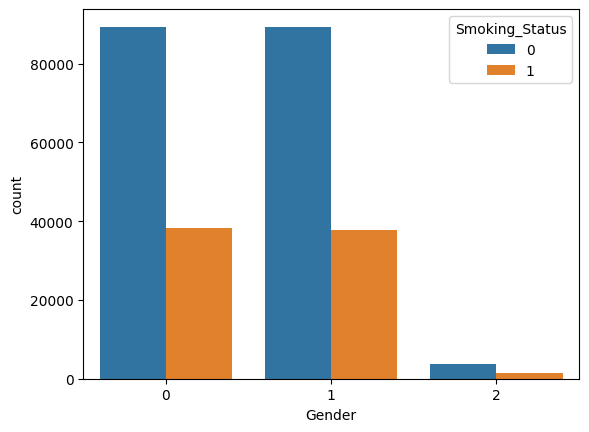

In [43]:
sns.countplot(x='Gender',data=df,hue='Smoking_Status')
plt.show()

In [ ]:
# Select only numerical columns from X
numerical_features = X.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numerical_features.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(260000, 15) (182000, 15) (78000, 15)


In [37]:
X.std()

Age                        20.750951
BMI                         4.997116
Smoking_Status              0.457792
Alcohol_Consumption         0.640707
Family_History_Cancer       0.401775
Genetic_Mutations           0.300057
Chronic_Diseases            0.781435
Radiation_Exposure          0.218572
Previous_Cancers            0.299616
White_Blood_Cell_Count      1.496819
Red_Blood_Cell_Count        0.501531
Platelet_Count             72.207496
Tumor_Markers               0.399776
Symptom_Severity            0.726292
Diagnosis_Delay_Days      210.924211
dtype: float64

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Define the parameter grid for Logistic Regression
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

In [ ]:
# Perform GridSearchCV for SVM
svm_grid_search = GridSearchCV(SVC(), svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train_scaled, Y_train)



In [ ]:
# Perform GridSearchCV for Logistic Regression
logreg_grid_search = GridSearchCV(LogisticRegression(), logreg_param_grid, cv=5, n_jobs=-1)
logreg_grid_search.fit(X_train_scaled, y_train)




In [ ]:
# Evaluate results
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best SVM accuracy on test set:", svm_grid_search.score(X_test_scaled, y_test))
print("\nSVM Classification Report:\n", classification_report(y_test, svm_grid_search.predict(X_test_scaled)))



In [ ]:
print("Best parameters for Logistic Regression:", logreg_grid_search.best_params_)
print("Best Logistic Regression accuracy on test set:", logreg_grid_search.score(X_test_scaled, y_test))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, logreg_grid_search.predict(X_test_scaled)))

In [42]:
classifier=SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [41]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)Z3WAQ1
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.8492197802197802
